In [17]:
!pip install hgboost

In [18]:
import pandas as pd

# Load the original CSV
input_file = "final_metadata_acoustic_features.csv"
output_file = "edward_uppercase_acoustic_features.csv"

# Read the CSV file
data = pd.read_csv(input_file)

# Convert the 'Phoneme' column to uppercase
if "Phoneme" in data.columns:
    data["Phoneme"] = data["Phoneme"].str.upper()

# Save the modified DataFrame to a new CSV
data.to_csv(output_file, index=False)

print(f"New CSV saved as: {output_file}")


New CSV saved as: edward_uppercase_acoustic_features.csv


All in one training



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("edward_uppercase_acoustic_features.csv")

# Step 1: Drop irrelevant columns
columns_to_drop = ["subjectID", "file_path", "voiced_file_path", "Severity", "Dataset", "Phoneme"]
data = data.drop(columns=columns_to_drop, errors="ignore")

# Step 2: Encode categorical features
categorical_columns = ["Sex", 'Age']  # Only keep 'Sex' as a categorical feature
encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])

# Step 3: Handle missing values
data = data.dropna()  # Drop rows with missing values

# Step 4: Separate features (X) and target (y)
acoustic_features = data.columns.difference(["label"])  # All columns except 'label'
X = data[acoustic_features]
y = data["label"]

# Step 5: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("Data preprocessing completed:")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Data preprocessing completed:
Training set size: (1008, 145)
Test set size: (432, 145)


Missing Values Per Column:
Age            0
Sex            0
label          0
rapJitter      0
localJitter    0
              ..
F0_F3_comp     0
F1_F2_comp     0
F1_F3_comp     0
F2_F3_comp     0
F0_IN_comp     0
Length: 146, dtype: int64
Data preprocessing completed:
Training set size: (1352, 145)
Test set size: (580, 145)

Logistic Regression Results:
Accuracy: 0.7000

Classification Report:
              precision    recall  f1-score   support

         ALS       0.67      0.90      0.77       172
          HC       0.74      0.51      0.61       222
         MSA       0.62      0.52      0.57        25
          PD       0.75      0.79      0.77       139
         PSP       0.56      0.64      0.60        22

    accuracy                           0.70       580
   macro avg       0.67      0.67      0.66       580
weighted avg       0.71      0.70      0.69       580



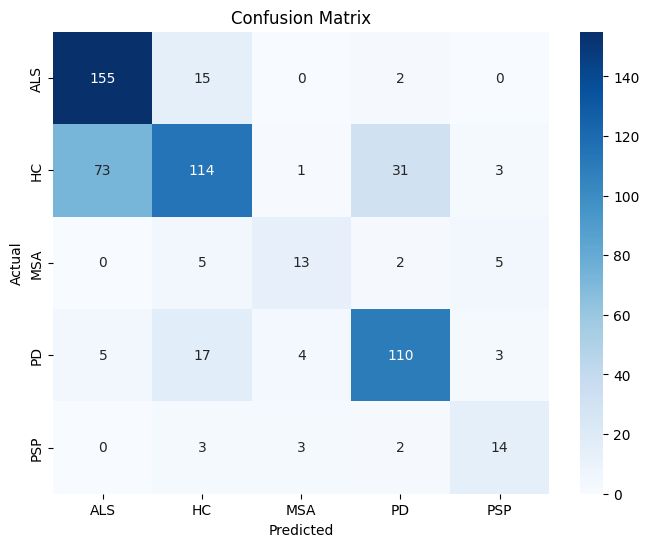

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("edward_uppercase_acoustic_features.csv")

# Step 1: Drop irrelevant columns
columns_to_drop = ["subjectID", "file_path", "voiced_file_path", "Severity", "Dataset", "Phoneme"]
data = data.drop(columns=columns_to_drop, errors="ignore")

# Step 2: Encode categorical features
categorical_columns = ["Sex", 'Age'] # Only keep 'Sex' as a categorical feature
encoder = LabelEncoder()
if "Sex" in data.columns:
    data["Sex"] = encoder.fit_transform(data["Sex"])

if "Age" in data.columns:
    data["Age"] = encoder.fit_transform(data["Age"])

# Step 3: Handle missing values (Identify and impute)
missing_summary = data.isnull().sum()
print("Missing Values Per Column:")
print(missing_summary)

# Impute missing values for numeric columns with their mean
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 4: Separate features (X) and target (y)
acoustic_features = data.columns.difference(["label"])  # All columns except 'label'
X = data[acoustic_features]
y = data["label"]

# Step 5: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("Data preprocessing completed:")
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Step 7: Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg.predict(X_test)
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Load the dataset
# data = pd.read_csv("final_metadata_acoustic_features.csv")

# # Step 1: Drop irrelevant columns
# columns_to_drop = ["subjectID", "file_path", "voiced_file_path", "Age", "Severity", "Dataset", "Phoneme"]
# data = data.drop(columns=columns_to_drop, errors="ignore")

# # Step 2: Encode categorical features
# categorical_columns = ["Sex"]  # Only keep 'Sex' as a categorical feature
# encoder = LabelEncoder()
# data["Sex"] = encoder.fit_transform(data["Sex"])

# # Step 3: Handle missing values (drop rows with missing acoustic features)
# # Drop rows with missing values in acoustic features
# data = data.dropna()

# Step 4: Separate features (X) and target (y)
acoustic_features = data.columns.difference(["label"])  # All columns except 'label'
X = data[acoustic_features]
y = data["label"]

# Step 5: Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Output results for validation
print("Preprocessing completed:")
print(f"Shape of feature matrix (X): {X_scaled.shape}")
print(f"Shape of target vector (y): {y.shape}")


Preprocessing completed:
Shape of feature matrix (X): (1932, 145)
Shape of target vector (y): (1932,)


In [22]:
# Step 7: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')  # 'balanced' handles class imbalance
log_reg.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = log_reg.predict(X_test)


Logistic Regression Accuracy: 0.7000

Classification Report:
              precision    recall  f1-score   support

         ALS       0.67      0.90      0.77       172
          HC       0.74      0.51      0.61       222
         MSA       0.62      0.52      0.57        25
          PD       0.75      0.79      0.77       139
         PSP       0.56      0.64      0.60        22

    accuracy                           0.70       580
   macro avg       0.67      0.67      0.66       580
weighted avg       0.71      0.70      0.69       580



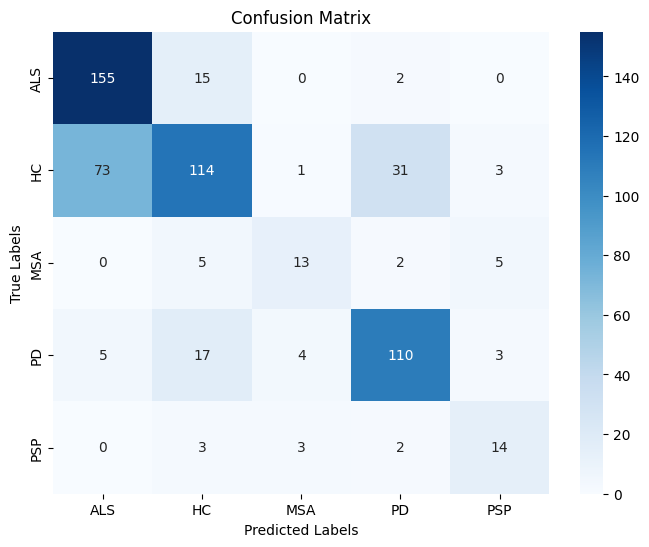

In [23]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [24]:
print (data)

      Age  Sex label  rapJitter  localJitter  localabsoluteJitter  ppq5Jitter  \
0      23    1   ALS   0.503824     0.980526             0.011030    0.634848   
1      42    0   ALS   0.775832     1.427598             0.013282    0.596112   
2      27    1   ALS   0.176218     0.317520             0.002083    0.180834   
3      47    1   ALS   0.466546     0.994922             0.010598    0.581968   
4      22    1   ALS   0.430975     0.874185             0.008597    0.534565   
...   ...  ...   ...        ...          ...                  ...         ...   
1927   50    0    PD   0.163933     0.607504             0.001600    0.299323   
1928   50    0    PD   0.159597     0.396626             0.001137    0.171659   
1929   50    0    PD   0.523773     2.416447             0.013863    0.803831   
1930   50    0    PD   0.416184     1.471770             0.005223    0.492510   
1931   50    0    PD   0.503813     1.863830             0.008624    0.676414   

      ddpJitter  localShimm

for each vowel


Processing vowel: A


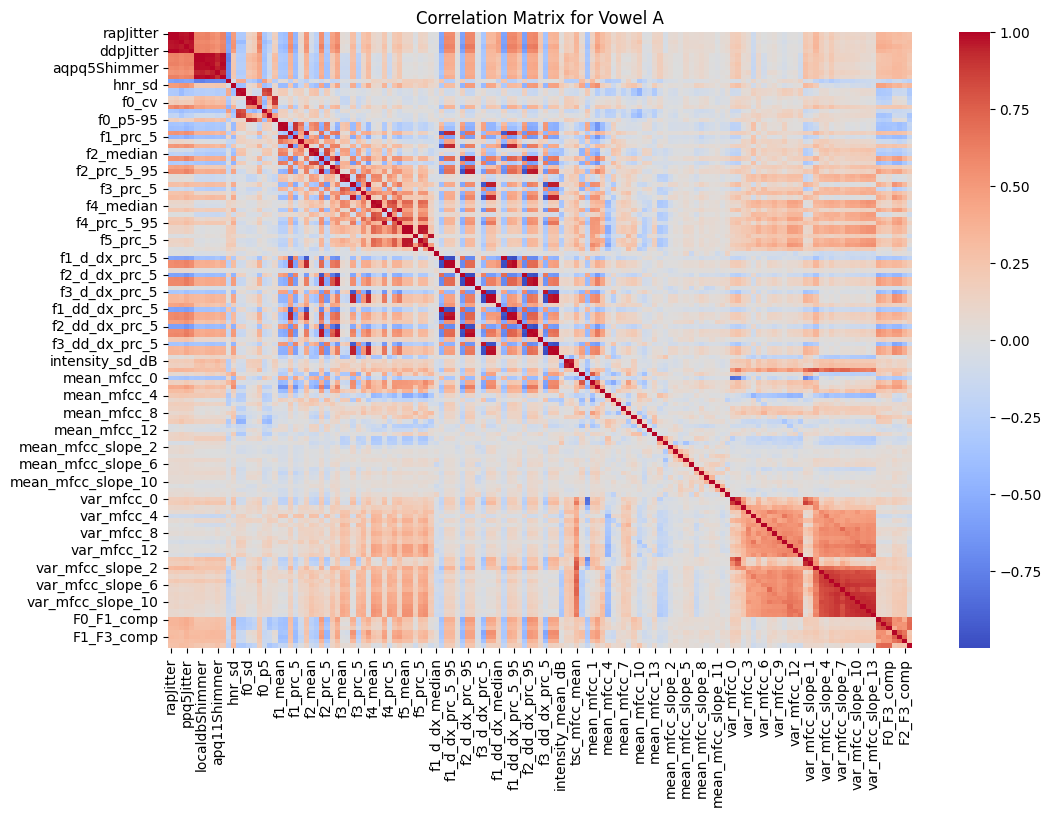

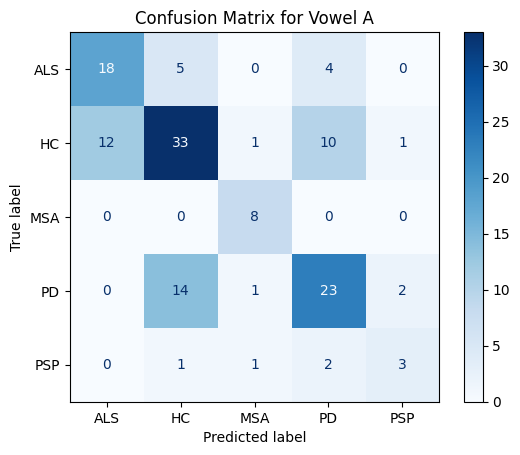

Processing vowel: E


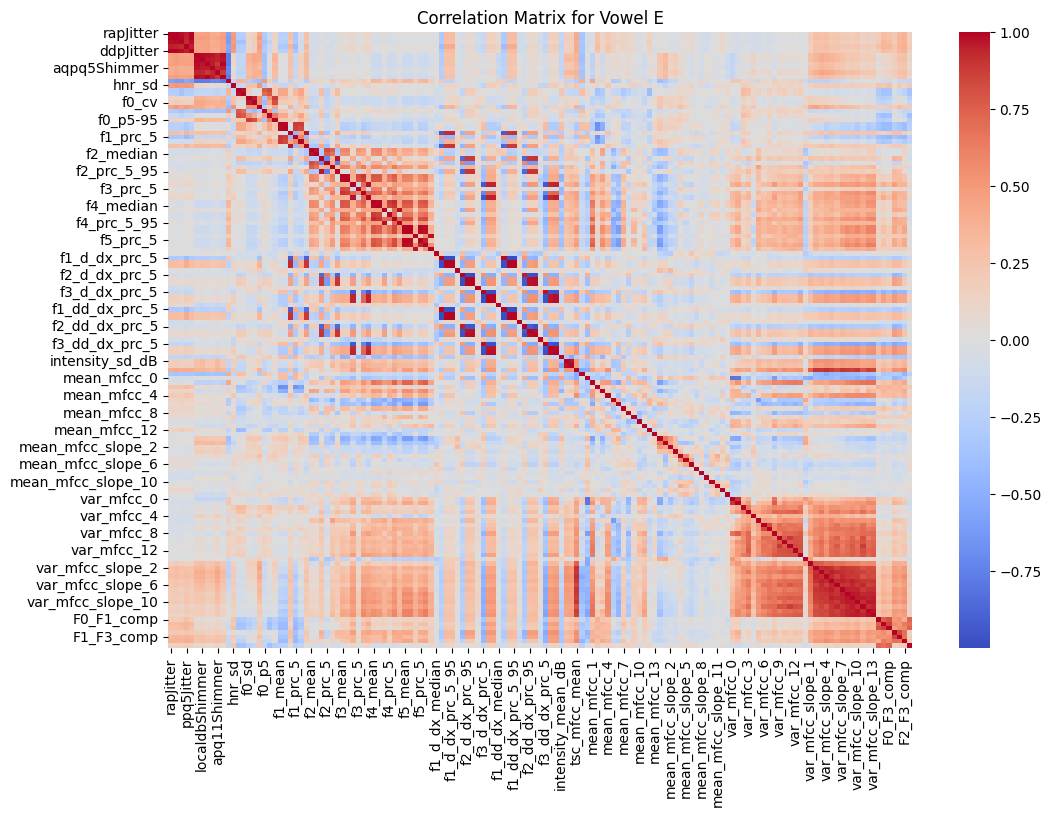

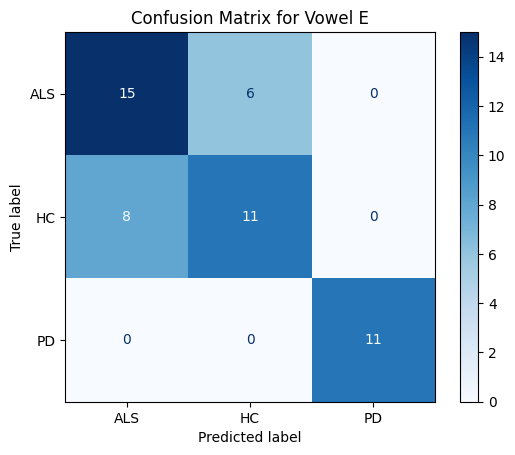

Processing vowel: I


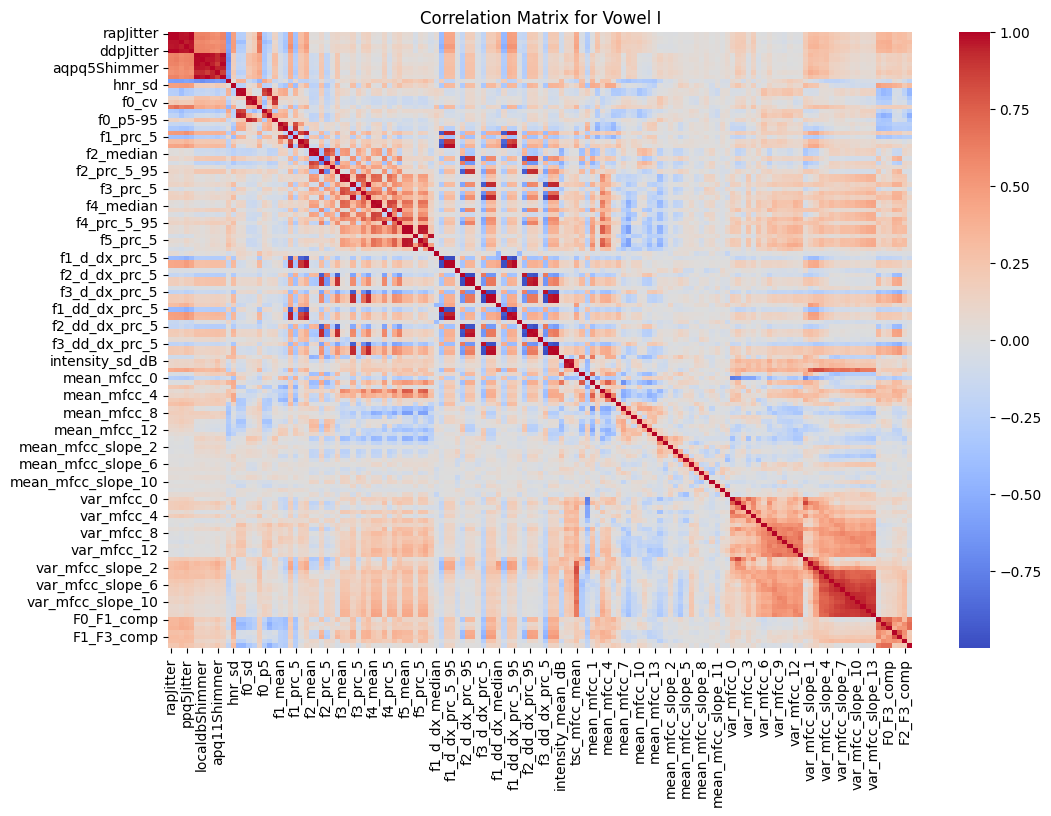

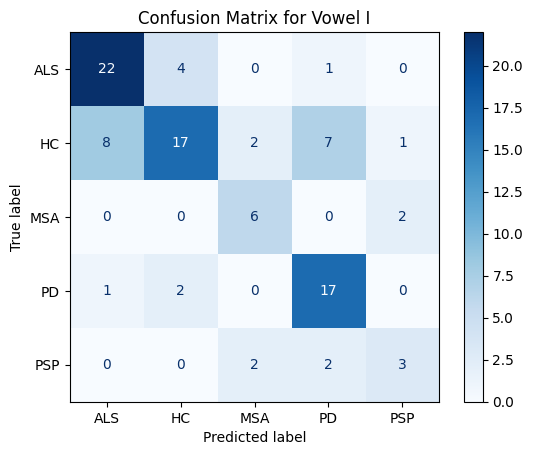

Processing vowel: O


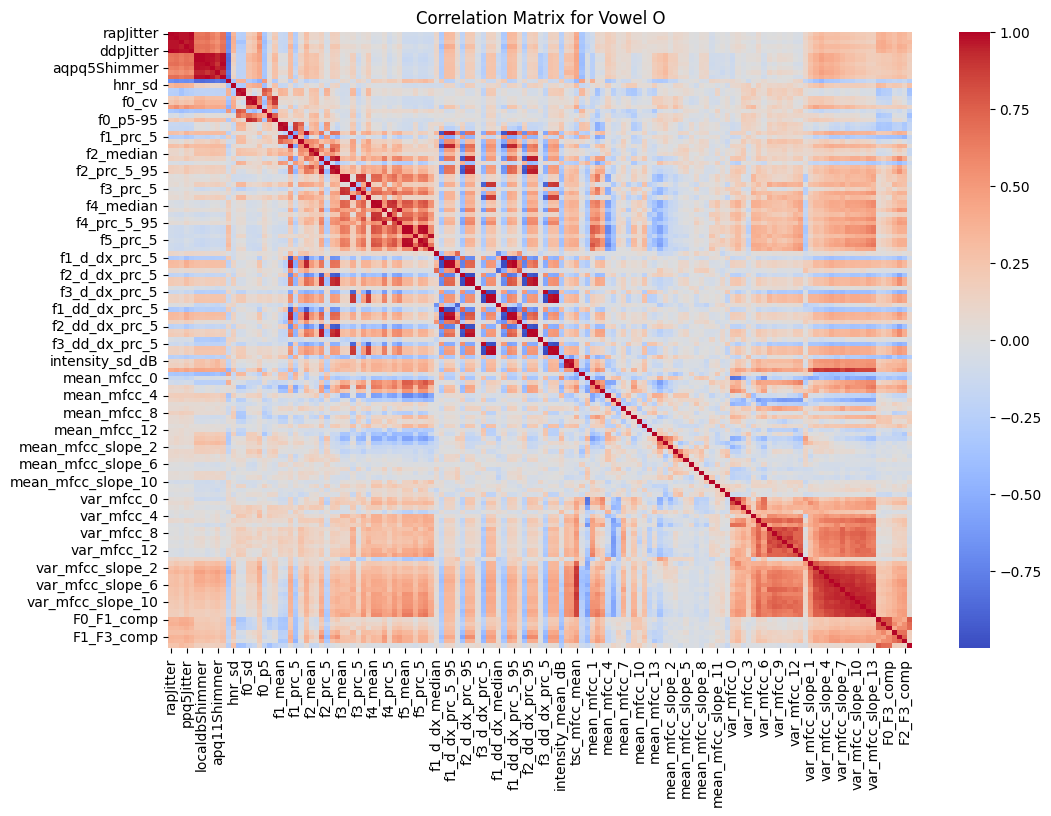

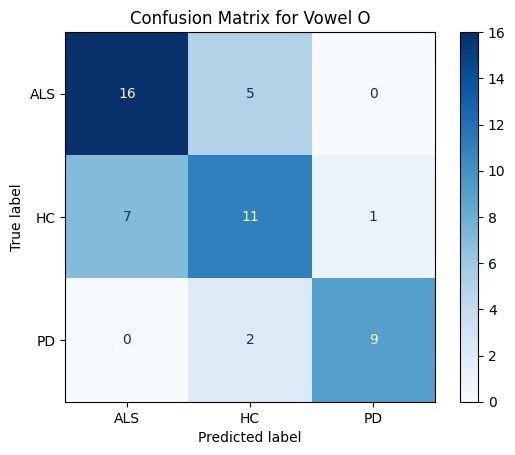

Processing vowel: U


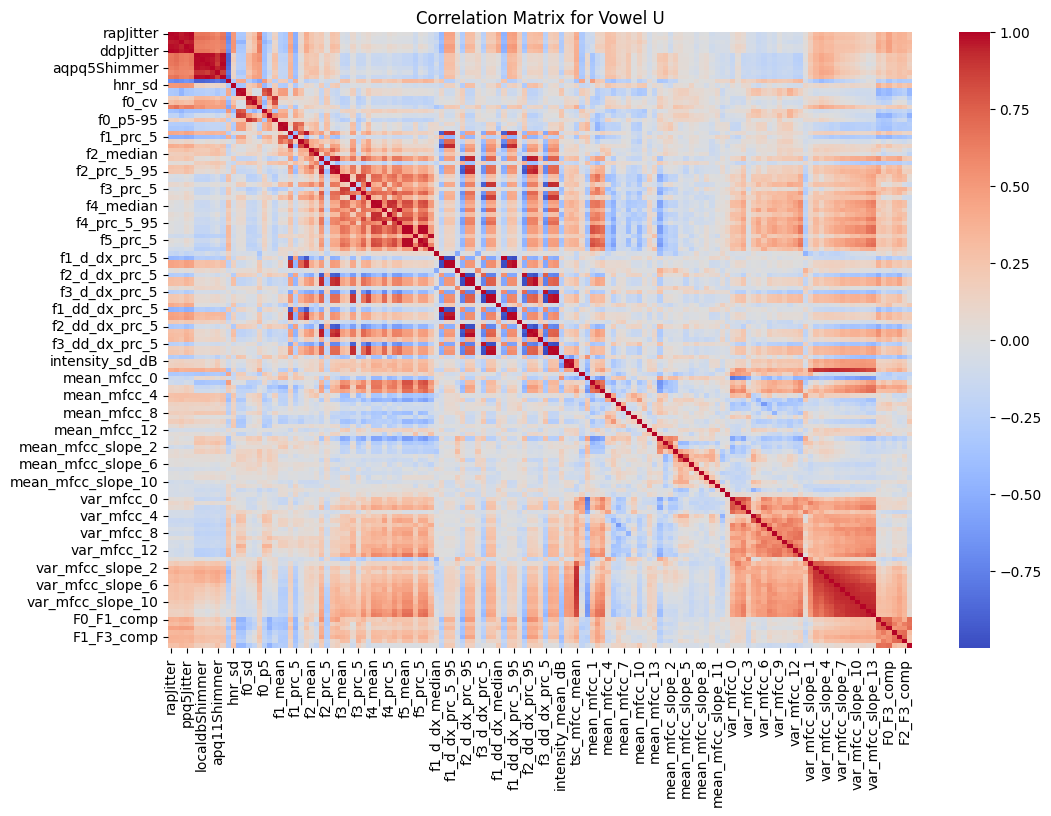

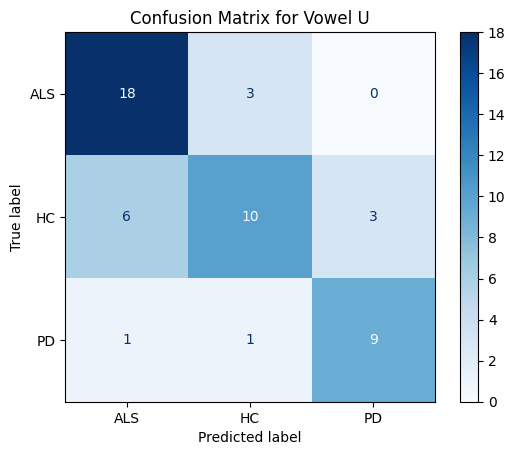


=== Results for Vowel A ===
Confusion Matrix:
[[18  5  0  4  0]
 [12 33  1 10  1]
 [ 0  0  8  0  0]
 [ 0 14  1 23  2]
 [ 0  1  1  2  3]]

Classification Report:
              precision    recall  f1-score     support
ALS            0.600000  0.666667  0.631579   27.000000
HC             0.622642  0.578947  0.600000   57.000000
MSA            0.727273  1.000000  0.842105    8.000000
PD             0.589744  0.575000  0.582278   40.000000
PSP            0.500000  0.428571  0.461538    7.000000
accuracy       0.611511  0.611511  0.611511    0.611511
macro avg      0.607932  0.649837  0.623500  139.000000
weighted avg   0.608622  0.611511  0.607996  139.000000

=== Results for Vowel E ===
Confusion Matrix:
[[15  6  0]
 [ 8 11  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support
ALS            0.652174  0.714286  0.681818  21.00000
HC             0.647059  0.578947  0.611111  19.00000
PD             1.000000  1.000000  1.000000  11.00000
accuracy  

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the dataset
data = pd.read_csv("edward_uppercase_acoustic_features.csv")

# Drop rows where the target (label) is missing
data = data.dropna(subset=["label"])

# Extract vowels
vowels = data["Phoneme"].unique()

# Store results for comparison
vowel_results = {}

for vowel in vowels:
    print(f"Processing vowel: {vowel}")
    
    # Filter data for the specific vowel
    vowel_data = data[data["Phoneme"] == vowel]
    
    # Define feature columns (exclude unwanted columns like Phoneme, Dataset, subjectID)
    feature_columns = [col for col in vowel_data.columns if col not in ["subjectID", "file_path", "voiced_file_path", "Age", "Sex", "Severity", "Phoneme", "label", "Dataset"]]
    X = vowel_data[feature_columns]
    y = vowel_data["label"]
    
    # Handle missing values in X using a SimpleImputer (mean strategy)
    imputer = SimpleImputer(strategy="mean")
    X_imputed = imputer.fit_transform(X)
    
    # Generate correlation matrix
    corr_matrix = pd.DataFrame(X_imputed, columns=feature_columns).corr()
    
    # Visualize the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
    plt.title(f"Correlation Matrix for Vowel {vowel}")
    plt.show()
    
    # Check if there are at least two classes for the vowel
    if len(np.unique(y)) < 2:
        print(f"Skipping vowel {vowel} due to insufficient classes.")
        continue

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
    log_reg.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = log_reg.predict(X_test_scaled)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Classification report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Visualize confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix for Vowel {vowel}")
    plt.show()
    
    # Store results
    vowel_results[vowel] = {
        "correlation_matrix": corr_matrix,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }

# Summarize results
for vowel, results in vowel_results.items():
    print(f"\n=== Results for Vowel {vowel} ===")
    print("Confusion Matrix:")
    print(results["confusion_matrix"])
    print("\nClassification Report:")
    print(pd.DataFrame(results["classification_report"]).transpose())



Processing Disease Pair: ('HC', 'ALS'), Vowel: A
Filtered data size after disease pair filtering (('HC', 'ALS')): (1313, 148)
Filtered data size after vowel filtering (A): (417, 148)
KNN Accuracy for ('HC', 'ALS') (Vowel: A): 0.7460

Classification Report:
              precision    recall  f1-score   support

         ALS       0.60      0.60      0.60        40
          HC       0.81      0.81      0.81        86

    accuracy                           0.75       126
   macro avg       0.71      0.71      0.71       126
weighted avg       0.75      0.75      0.75       126



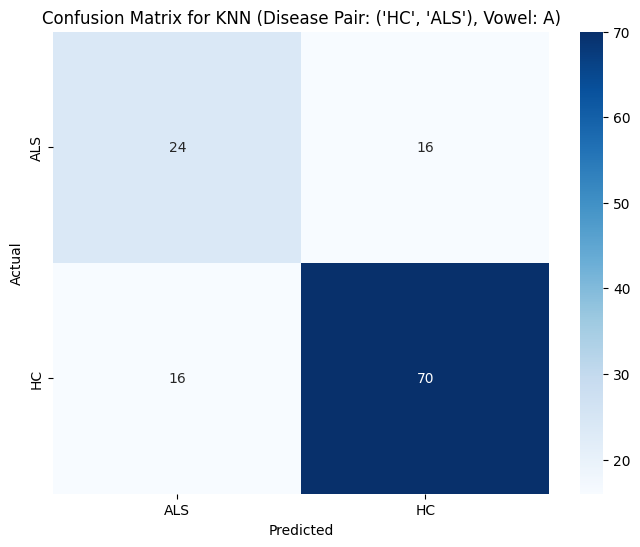


Processing Disease Pair: ('HC', 'ALS'), Vowel: E
Filtered data size after disease pair filtering (('HC', 'ALS')): (1313, 148)
Filtered data size after vowel filtering (E): (197, 148)
KNN Accuracy for ('HC', 'ALS') (Vowel: E): 0.6667

Classification Report:
              precision    recall  f1-score   support

         ALS       0.65      0.77      0.71        31
          HC       0.70      0.55      0.62        29

    accuracy                           0.67        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.67      0.67      0.66        60



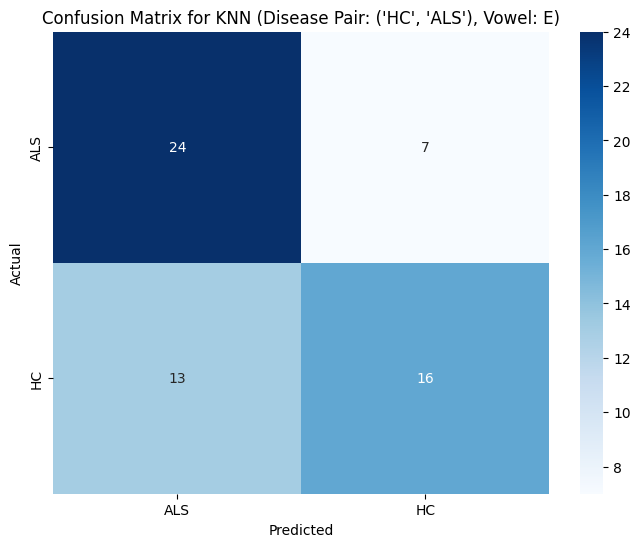


Processing Disease Pair: ('HC', 'ALS'), Vowel: I
Filtered data size after disease pair filtering (('HC', 'ALS')): (1313, 148)
Filtered data size after vowel filtering (I): (305, 148)
KNN Accuracy for ('HC', 'ALS') (Vowel: I): 0.7717

Classification Report:
              precision    recall  f1-score   support

         ALS       0.73      0.75      0.74        40
          HC       0.80      0.79      0.80        52

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92



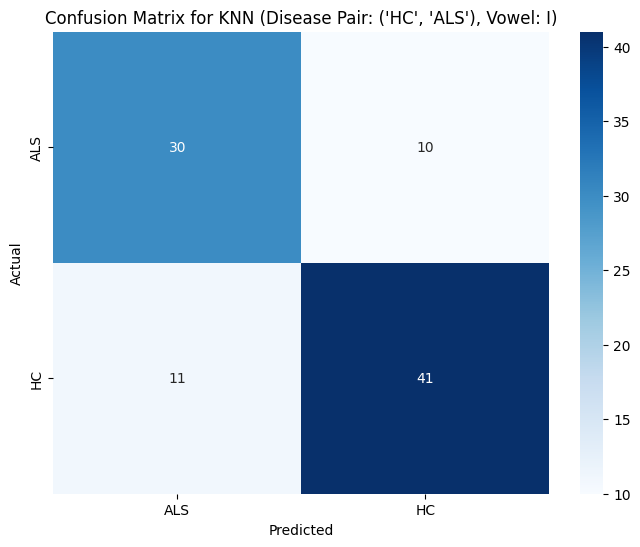


Processing Disease Pair: ('HC', 'ALS'), Vowel: O
Filtered data size after disease pair filtering (('HC', 'ALS')): (1313, 148)
Filtered data size after vowel filtering (O): (197, 148)
KNN Accuracy for ('HC', 'ALS') (Vowel: O): 0.7000

Classification Report:
              precision    recall  f1-score   support

         ALS       0.67      0.84      0.74        31
          HC       0.76      0.55      0.64        29

    accuracy                           0.70        60
   macro avg       0.71      0.70      0.69        60
weighted avg       0.71      0.70      0.69        60



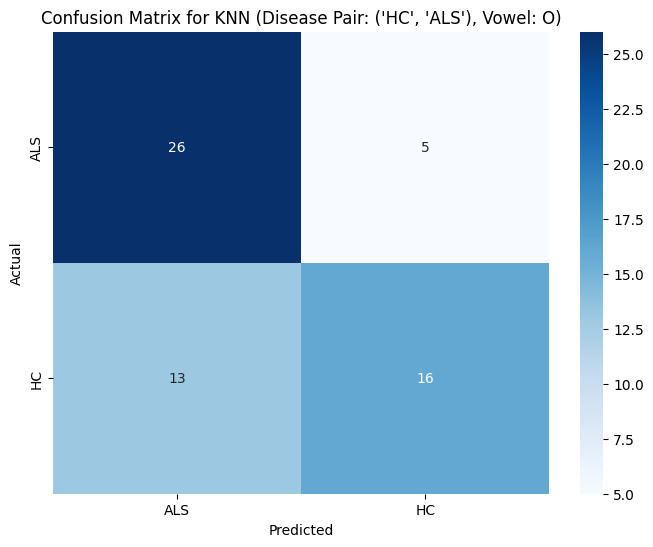


Processing Disease Pair: ('HC', 'ALS'), Vowel: U
Filtered data size after disease pair filtering (('HC', 'ALS')): (1313, 148)
Filtered data size after vowel filtering (U): (197, 148)
KNN Accuracy for ('HC', 'ALS') (Vowel: U): 0.6833

Classification Report:
              precision    recall  f1-score   support

         ALS       0.66      0.81      0.72        31
          HC       0.73      0.55      0.63        29

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.69      0.68      0.68        60



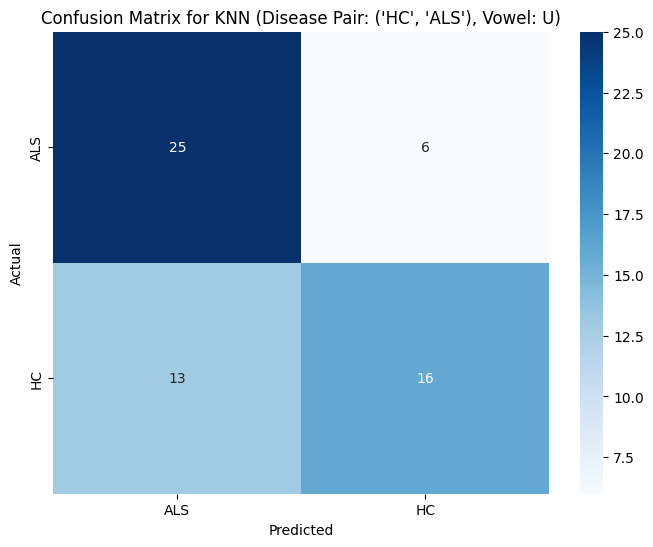


Processing Disease Pair: ('HC', 'PD'), Vowel: A
Filtered data size after disease pair filtering (('HC', 'PD')): (1204, 148)
Filtered data size after vowel filtering (A): (482, 148)
KNN Accuracy for ('HC', 'PD') (Vowel: A): 0.7517

Classification Report:
              precision    recall  f1-score   support

          HC       0.75      0.87      0.80        85
          PD       0.76      0.58      0.66        60

    accuracy                           0.75       145
   macro avg       0.75      0.73      0.73       145
weighted avg       0.75      0.75      0.74       145



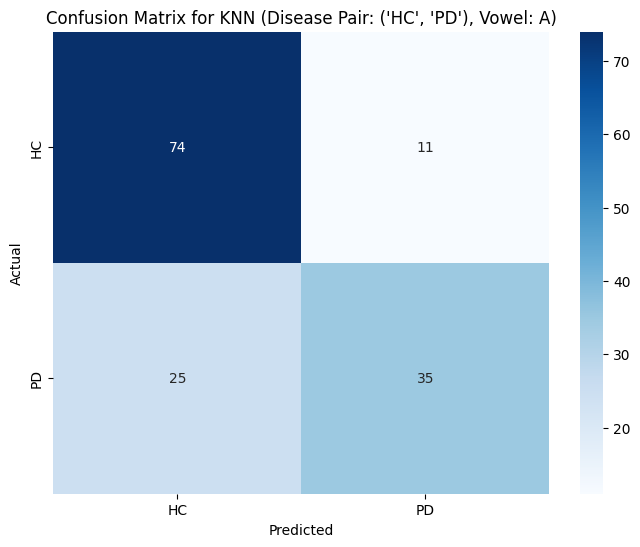


Processing Disease Pair: ('HC', 'PD'), Vowel: E
Filtered data size after disease pair filtering (('HC', 'PD')): (1204, 148)
Filtered data size after vowel filtering (E): (150, 148)
KNN Accuracy for ('HC', 'PD') (Vowel: E): 0.8444

Classification Report:
              precision    recall  f1-score   support

          HC       0.92      0.83      0.87        29
          PD       0.74      0.88      0.80        16

    accuracy                           0.84        45
   macro avg       0.83      0.85      0.84        45
weighted avg       0.86      0.84      0.85        45



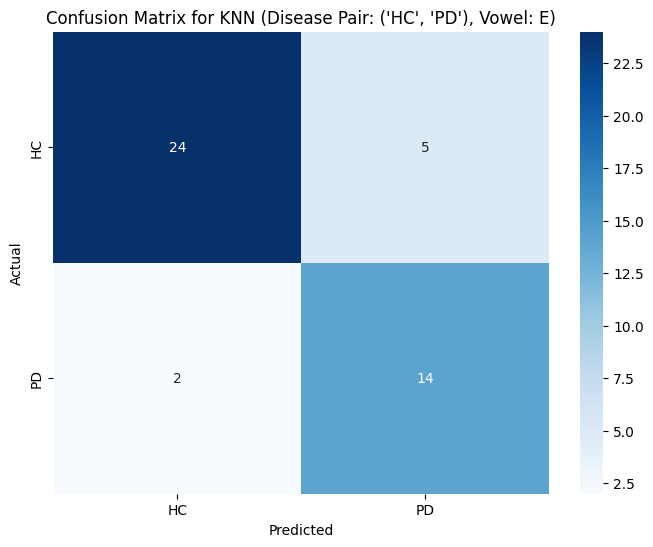


Processing Disease Pair: ('HC', 'PD'), Vowel: I
Filtered data size after disease pair filtering (('HC', 'PD')): (1204, 148)
Filtered data size after vowel filtering (I): (272, 148)
KNN Accuracy for ('HC', 'PD') (Vowel: I): 0.7561

Classification Report:
              precision    recall  f1-score   support

          HC       0.82      0.79      0.80        52
          PD       0.66      0.70      0.68        30

    accuracy                           0.76        82
   macro avg       0.74      0.74      0.74        82
weighted avg       0.76      0.76      0.76        82



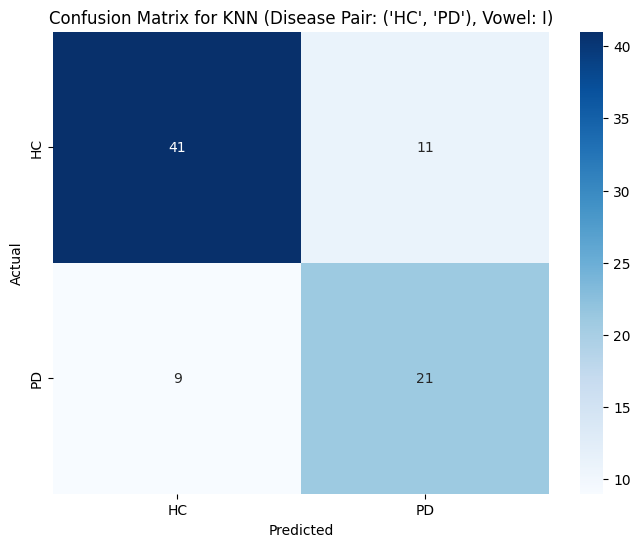


Processing Disease Pair: ('HC', 'PD'), Vowel: O
Filtered data size after disease pair filtering (('HC', 'PD')): (1204, 148)
Filtered data size after vowel filtering (O): (150, 148)
KNN Accuracy for ('HC', 'PD') (Vowel: O): 0.8222

Classification Report:
              precision    recall  f1-score   support

          HC       0.89      0.83      0.86        29
          PD       0.72      0.81      0.76        16

    accuracy                           0.82        45
   macro avg       0.81      0.82      0.81        45
weighted avg       0.83      0.82      0.82        45



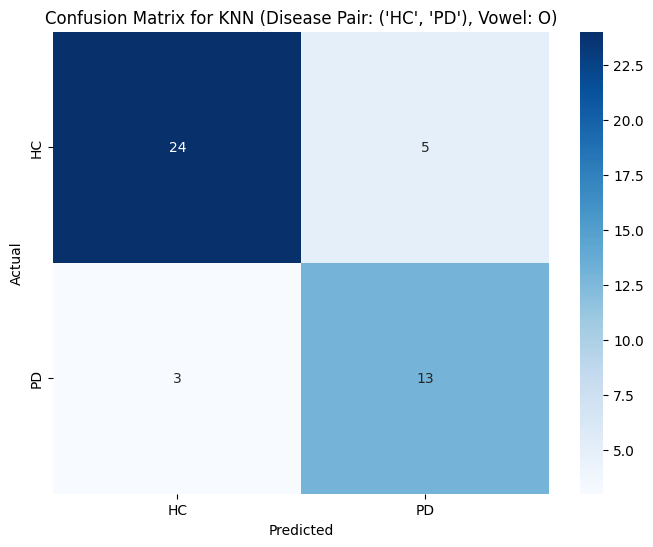


Processing Disease Pair: ('HC', 'PD'), Vowel: U
Filtered data size after disease pair filtering (('HC', 'PD')): (1204, 148)
Filtered data size after vowel filtering (U): (150, 148)
KNN Accuracy for ('HC', 'PD') (Vowel: U): 0.8667

Classification Report:
              precision    recall  f1-score   support

          HC       0.83      1.00      0.91        29
          PD       1.00      0.62      0.77        16

    accuracy                           0.87        45
   macro avg       0.91      0.81      0.84        45
weighted avg       0.89      0.87      0.86        45



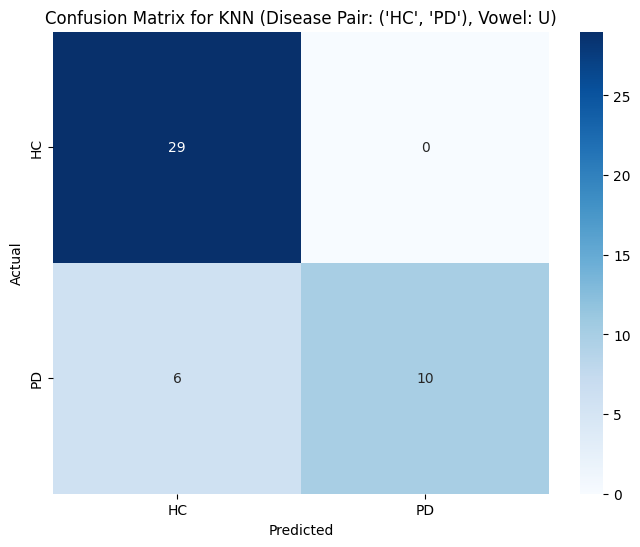


Processing Disease Pair: ('HC', 'PSP'), Vowel: A
Filtered data size after disease pair filtering (('HC', 'PSP')): (813, 148)
Filtered data size after vowel filtering (A): (320, 148)
KNN Accuracy for ('HC', 'PSP') (Vowel: A): 0.8854

Classification Report:
              precision    recall  f1-score   support

          HC       0.91      0.96      0.94        85
         PSP       0.50      0.27      0.35        11

    accuracy                           0.89        96
   macro avg       0.71      0.62      0.65        96
weighted avg       0.86      0.89      0.87        96



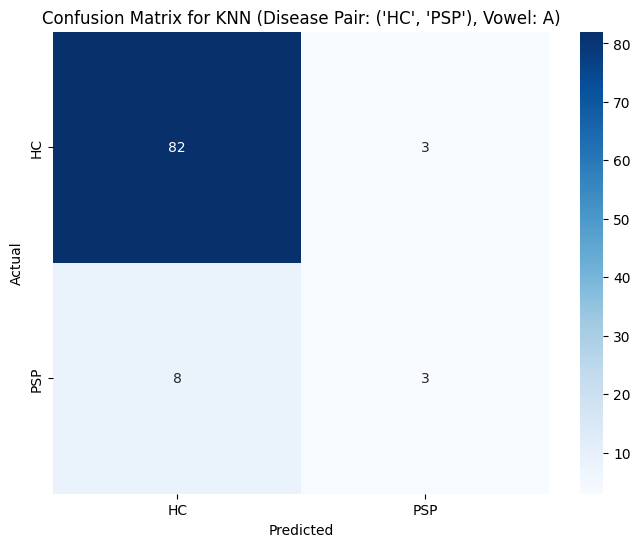


Processing Disease Pair: ('HC', 'PSP'), Vowel: E
Filtered data size after disease pair filtering (('HC', 'PSP')): (813, 148)
Filtered data size after vowel filtering (E): (95, 148)
No sufficient data for ('HC', 'PSP') (Vowel: E).

Processing Disease Pair: ('HC', 'PSP'), Vowel: I
Filtered data size after disease pair filtering (('HC', 'PSP')): (813, 148)
Filtered data size after vowel filtering (I): (208, 148)
KNN Accuracy for ('HC', 'PSP') (Vowel: I): 0.7937

Classification Report:
              precision    recall  f1-score   support

          HC       0.90      0.85      0.87        52
         PSP       0.43      0.55      0.48        11

    accuracy                           0.79        63
   macro avg       0.66      0.70      0.68        63
weighted avg       0.82      0.79      0.80        63



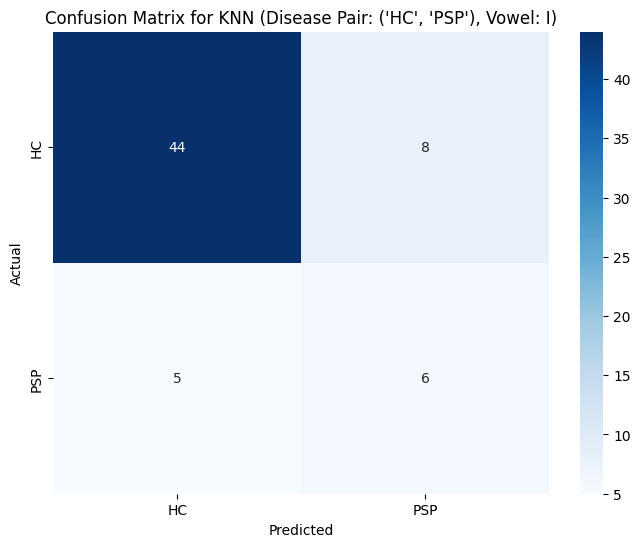


Processing Disease Pair: ('HC', 'PSP'), Vowel: O
Filtered data size after disease pair filtering (('HC', 'PSP')): (813, 148)
Filtered data size after vowel filtering (O): (95, 148)
No sufficient data for ('HC', 'PSP') (Vowel: O).

Processing Disease Pair: ('HC', 'PSP'), Vowel: U
Filtered data size after disease pair filtering (('HC', 'PSP')): (813, 148)
Filtered data size after vowel filtering (U): (95, 148)
No sufficient data for ('HC', 'PSP') (Vowel: U).

Processing Disease Pair: ('HC', 'MSA'), Vowel: A
Filtered data size after disease pair filtering (('HC', 'MSA')): (825, 148)
Filtered data size after vowel filtering (A): (326, 148)
KNN Accuracy for ('HC', 'MSA') (Vowel: A): 0.9592

Classification Report:
              precision    recall  f1-score   support

          HC       0.98      0.98      0.98        85
         MSA       0.85      0.85      0.85        13

    accuracy                           0.96        98
   macro avg       0.91      0.91      0.91        98
weighted 

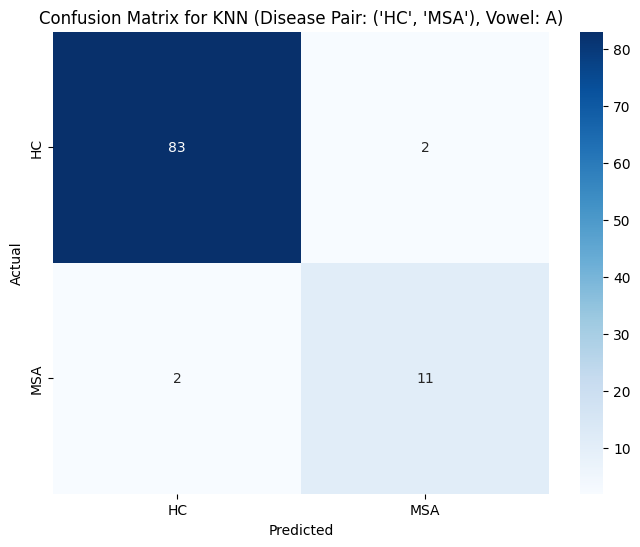


Processing Disease Pair: ('HC', 'MSA'), Vowel: E
Filtered data size after disease pair filtering (('HC', 'MSA')): (825, 148)
Filtered data size after vowel filtering (E): (95, 148)
No sufficient data for ('HC', 'MSA') (Vowel: E).

Processing Disease Pair: ('HC', 'MSA'), Vowel: I
Filtered data size after disease pair filtering (('HC', 'MSA')): (825, 148)
Filtered data size after vowel filtering (I): (214, 148)
KNN Accuracy for ('HC', 'MSA') (Vowel: I): 0.8000

Classification Report:
              precision    recall  f1-score   support

          HC       0.90      0.85      0.87        52
         MSA       0.50      0.62      0.55        13

    accuracy                           0.80        65
   macro avg       0.70      0.73      0.71        65
weighted avg       0.82      0.80      0.81        65



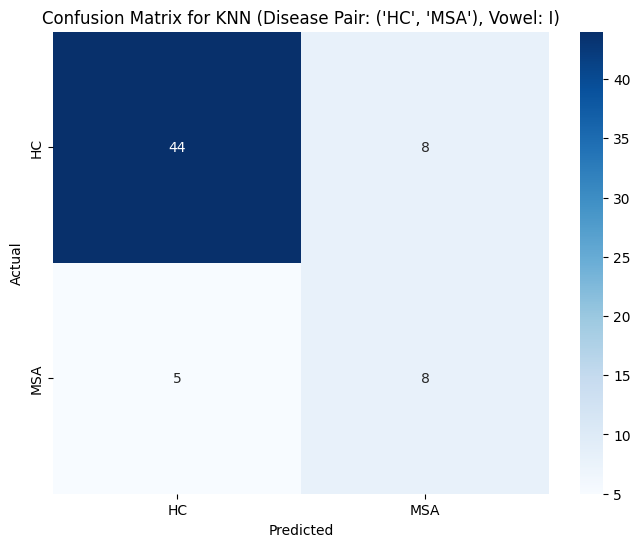


Processing Disease Pair: ('HC', 'MSA'), Vowel: O
Filtered data size after disease pair filtering (('HC', 'MSA')): (825, 148)
Filtered data size after vowel filtering (O): (95, 148)
No sufficient data for ('HC', 'MSA') (Vowel: O).

Processing Disease Pair: ('HC', 'MSA'), Vowel: U
Filtered data size after disease pair filtering (('HC', 'MSA')): (825, 148)
Filtered data size after vowel filtering (U): (95, 148)
No sufficient data for ('HC', 'MSA') (Vowel: U).

Summary of KNN Results:
   Disease_Pair Vowel  Accuracy
0     (HC, ALS)     A  0.746032
1     (HC, ALS)     E  0.666667
2     (HC, ALS)     I  0.771739
3     (HC, ALS)     O  0.700000
4     (HC, ALS)     U  0.683333
5      (HC, PD)     A  0.751724
6      (HC, PD)     E  0.844444
7      (HC, PD)     I  0.756098
8      (HC, PD)     O  0.822222
9      (HC, PD)     U  0.866667
10    (HC, PSP)     A  0.885417
11    (HC, PSP)     I  0.793651
12    (HC, MSA)     A  0.959184
13    (HC, MSA)     I  0.800000


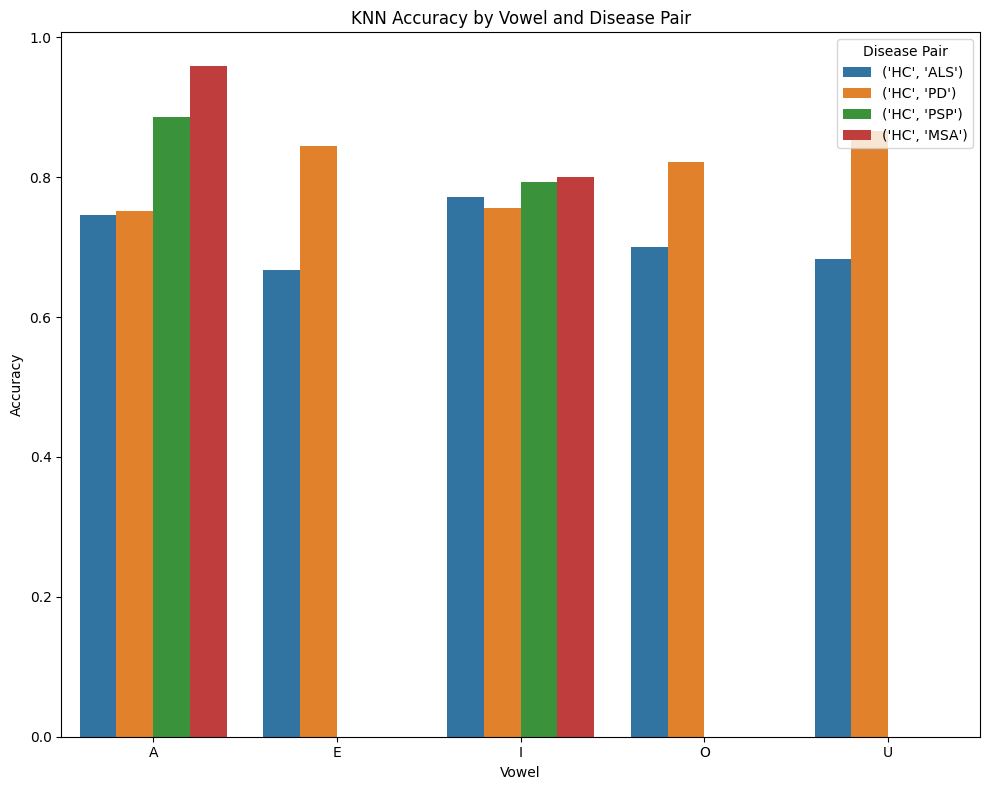

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
data = pd.read_csv("edward_uppercase_acoustic_features.csv")

# Drop irrelevant columns
columns_to_drop = ["subjectID", "file_path", "voiced_file_path", "Dataset"]
data = data.drop(columns=columns_to_drop, errors="ignore")

# Encode categorical features
categorical_columns = ["Sex", "Age", "Severity"]
encoder = LabelEncoder()
for col in categorical_columns:
    if col in data.columns:
        data[col] = encoder.fit_transform(data[col])

# Map vowels to ensure the 'Phoneme' column is consistent with AEIOU
vowel_map = {"A": 0, "E": 1, "I": 2, "O": 3, "U": 4}
data["Phoneme"] = data["Phoneme"].map(vowel_map)

# Handle missing values
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Step 2: Define the KNN function for classification by vowel
def train_knn_per_vowel(data, disease_pair, vowel_map, n_neighbors=5):
    """
    Train and evaluate KNN classifier for each vowel and disease pair.
    """
    results = []  # To store results for each vowel

    for vowel_label, vowel_encoded in vowel_map.items():
        print(f"\nProcessing Disease Pair: {disease_pair}, Vowel: {vowel_label}")
        
        # Filter data for the disease pair
        filtered_data = data[data["label"].isin(disease_pair)]
        print(f"Filtered data size after disease pair filtering ({disease_pair}):", filtered_data.shape)
        
        # Filter data for the current vowel
        filtered_data = filtered_data[filtered_data["Phoneme"] == vowel_encoded]
        print(f"Filtered data size after vowel filtering ({vowel_label}):", filtered_data.shape)
        
        # Check if there is sufficient data
        if filtered_data.empty or len(filtered_data["label"].unique()) < 2:
            print(f"No sufficient data for {disease_pair} (Vowel: {vowel_label}).")
            continue
        
        # Separate features and target
        acoustic_features = filtered_data.columns.difference(["label", "Phoneme"])
        X = filtered_data[acoustic_features]
        y = filtered_data["label"]
        
        # Encode the target variable
        y_encoded = encoder.fit_transform(y)
        
        # Scale numeric features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
        )
        
        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
        knn.fit(X_train, y_train)
        
        # Make predictions
        y_pred_knn = knn.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_knn)
        print(f"KNN Accuracy for {disease_pair} (Vowel: {vowel_label}): {accuracy:.4f}")
        
        # Save the results
        results.append({
            "Disease_Pair": disease_pair,
            "Vowel": vowel_label,
            "Accuracy": accuracy
        })
        
        # Classification report and confusion matrix (optional for debugging purposes)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred_knn, target_names=encoder.classes_))
        
        conf_matrix = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_
        )
        plt.title(f"Confusion Matrix for KNN (Disease Pair: {disease_pair}, Vowel: {vowel_label})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    return results

# Step 3: Run the function for each disease pair and vowel
disease_pairs = [("HC", "ALS"), ("HC", "PD"), ("HC", "PSP"), ("HC", "MSA")]
results_knn = []

for pair in disease_pairs:
    results_knn.extend(train_knn_per_vowel(data, disease_pair=pair, vowel_map=vowel_map))

# Step 4: Convert results to a DataFrame and display
results_df = pd.DataFrame(results_knn)
print("\nSummary of KNN Results:")
print(results_df)

# Save or visualize results
plt.figure(figsize=(10, 8))
sns.barplot(x="Vowel", y="Accuracy", hue="Disease_Pair", data=results_df)
plt.title("KNN Accuracy by Vowel and Disease Pair")
plt.xlabel("Vowel")
plt.ylabel("Accuracy")
plt.legend(title="Disease Pair", loc="upper right")
plt.tight_layout()
plt.show()


Logistic Regression Results (Accuracy Matrix):
  Vowel    PD   ALS   MSA   PSP
0     A  0.65  0.76  0.92  0.91
1     E  1.00  0.78   NaN   NaN
2     I  0.75  0.74  0.98  0.86
3     O  0.97  0.72   NaN   NaN
4     U  0.93  0.75   NaN   NaN


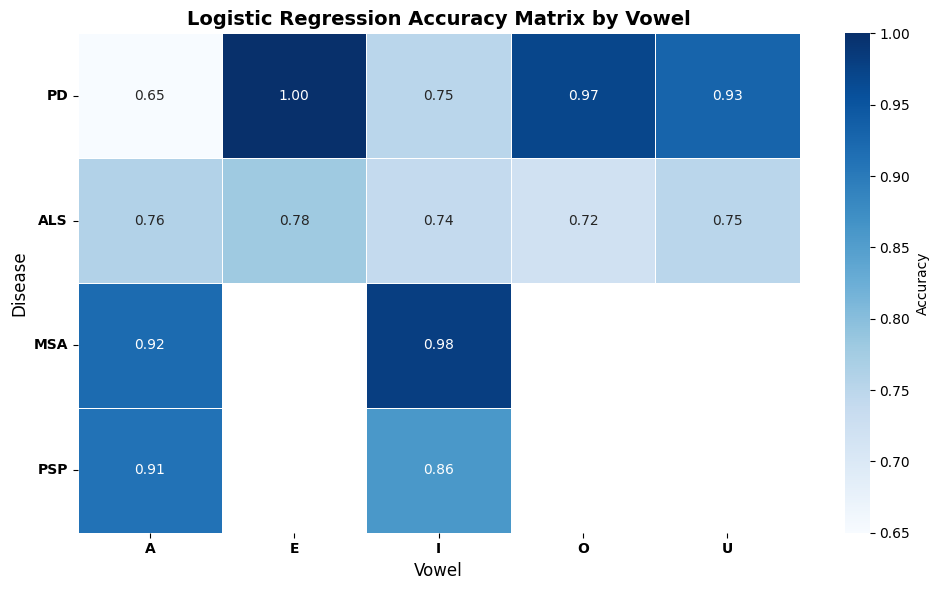

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

log_reg_results = {
    'Vowel': ['A', 'E', 'I', 'O', 'U'],
    'PD': [0.65, 1.00, 0.75, 0.97, 0.93],
    'ALS': [0.76, 0.78, 0.74, 0.72, 0.75],
    'MSA': [0.92, np.nan, 0.98, np.nan, np.nan],
    'PSP': [0.91, np.nan, 0.86, np.nan, np.nan],
}

# Convert results to DataFrame
results_df = pd.DataFrame(log_reg_results)

# Display the table
print("Logistic Regression Results (Accuracy Matrix):")
print(results_df)

# Heatmap Display
plt.figure(figsize=(10, 6))
sns.heatmap(
    results_df.set_index('Vowel').T,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Accuracy'},
    annot_kws={"size": 10}
)
plt.title("Logistic Regression Accuracy Matrix by Vowel", fontsize=14, weight='bold')
plt.xlabel("Vowel", fontsize=12)
plt.ylabel("Disease", fontsize=12)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, rotation=0, weight='bold')
plt.tight_layout()
plt.show()


Phoneme column is encoded; attempting to decode...

Processing for Vowel: A
KNN Accuracy for Vowel A: 0.6106

Classification Report:
              precision    recall  f1-score   support

         ALS       0.56      0.60      0.58        40
          HC       0.60      0.72      0.65        85
         MSA       0.60      0.69      0.64        13
          PD       0.74      0.47      0.58        59
         PSP       0.50      0.45      0.48        11

    accuracy                           0.61       208
   macro avg       0.60      0.59      0.59       208
weighted avg       0.62      0.61      0.61       208



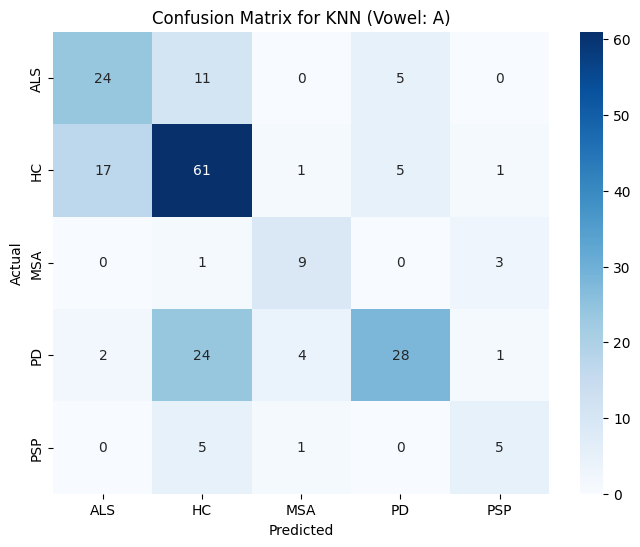


Processing for Vowel: E
KNN Accuracy for Vowel E: 0.6711

Classification Report:
              precision    recall  f1-score   support

         ALS       0.63      0.71      0.67        31
          HC       0.59      0.59      0.59        29
          PD       1.00      0.75      0.86        16

    accuracy                           0.67        76
   macro avg       0.74      0.68      0.70        76
weighted avg       0.69      0.67      0.68        76



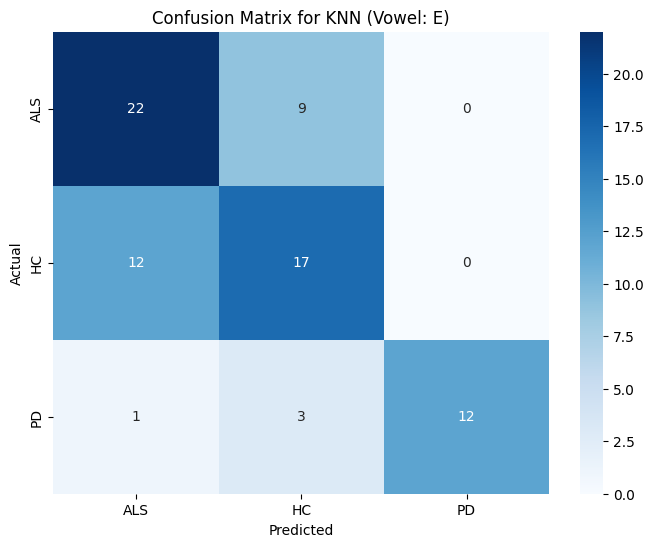


Processing for Vowel: I
KNN Accuracy for Vowel I: 0.6276

Classification Report:
              precision    recall  f1-score   support

         ALS       0.71      0.72      0.72        40
          HC       0.67      0.60      0.63        52
         MSA       0.55      0.50      0.52        12
          PD       0.55      0.70      0.62        30
         PSP       0.44      0.36      0.40        11

    accuracy                           0.63       145
   macro avg       0.58      0.58      0.58       145
weighted avg       0.63      0.63      0.63       145



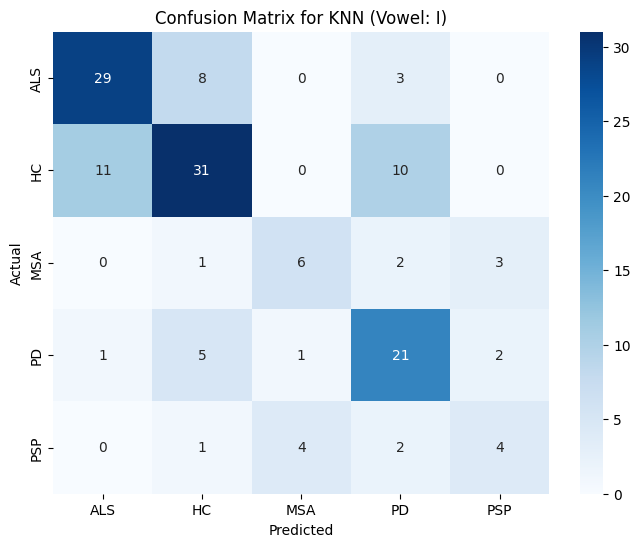


Processing for Vowel: O
KNN Accuracy for Vowel O: 0.7105

Classification Report:
              precision    recall  f1-score   support

         ALS       0.64      0.87      0.74        31
          HC       0.68      0.52      0.59        29
          PD       1.00      0.75      0.86        16

    accuracy                           0.71        76
   macro avg       0.77      0.71      0.73        76
weighted avg       0.73      0.71      0.71        76



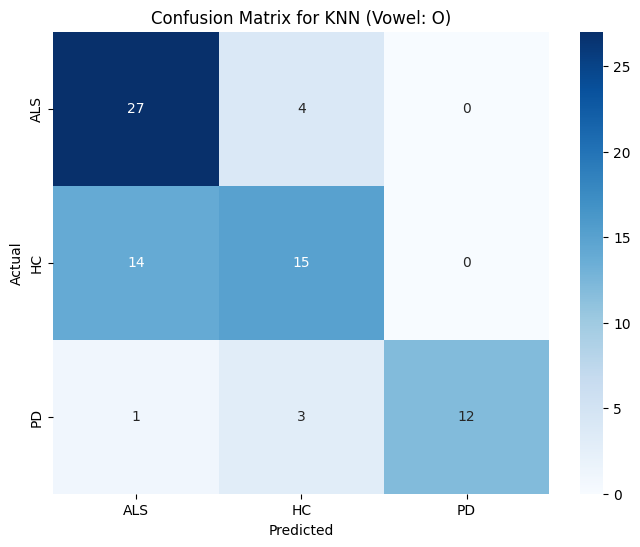


Processing for Vowel: U
KNN Accuracy for Vowel U: 0.6842

Classification Report:
              precision    recall  f1-score   support

         ALS       0.62      0.81      0.70        31
          HC       0.65      0.52      0.58        29
          PD       0.92      0.75      0.83        16

    accuracy                           0.68        76
   macro avg       0.73      0.69      0.70        76
weighted avg       0.70      0.68      0.68        76



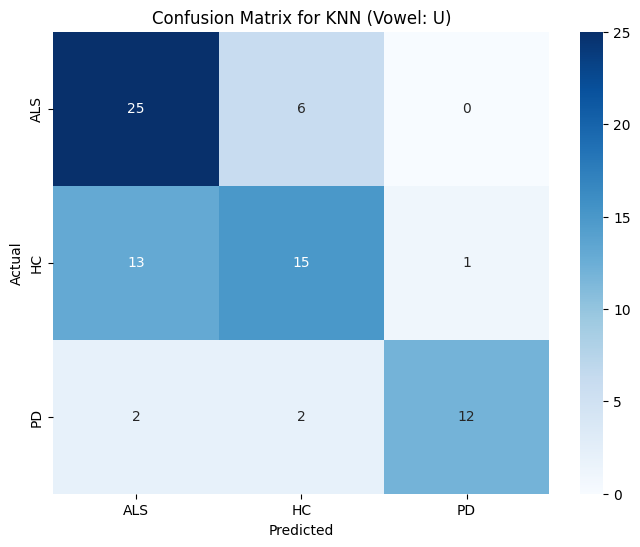

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_knn_per_vowel(data, n_neighbors=5):
    """
    Train and evaluate KNN classifier for each vowel.
    """
    # Check if "Phoneme" is encoded, and reverse the encoding if necessary
    if data["Phoneme"].dtype != "object":  # Likely encoded as numbers
        print("Phoneme column is encoded; attempting to decode...")
        phoneme_encoder = LabelEncoder()
        phoneme_encoder.fit(["A", "E", "I", "O", "U"])  # Assuming these are the original vowels
        try:
            data["Phoneme"] = phoneme_encoder.inverse_transform(data["Phoneme"])
        except ValueError:
            print("Error decoding 'Phoneme'. Ensure that it matches the encoded mapping.")
            return

    # Ensure "Phoneme" is in uppercase
    data["Phoneme"] = data["Phoneme"].astype(str).str.upper()
    vowels = ["A", "E", "I", "O", "U"]  # Standard vowels

    results = []  # To store results for each vowel

    for vowel in vowels:
        print(f"\nProcessing for Vowel: {vowel}")
        # Filter data for the current vowel
        filtered_data = data[data["Phoneme"] == vowel]
        
        # Check if filtered data exists
        if filtered_data.empty:
            print(f"No data available for vowel: {vowel}")
            continue
        
        # Separate features and target
        acoustic_features = filtered_data.select_dtypes(include=["float64", "int64"]).columns.difference(["label"])
        X = filtered_data[acoustic_features]
        y = filtered_data["label"]

        # Check if features or labels are empty
        if X.empty or y.empty:
            print(f"No valid data for vowel: {vowel}")
            continue
        
        # Encode target variable
        encoder = LabelEncoder()
        y_encoded = encoder.fit_transform(y)
        
        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split into train and test sets
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
            )
        except ValueError as e:
            print(f"Error during train-test split for vowel {vowel}: {e}")
            continue
        
        # Train KNN model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
        knn.fit(X_train, y_train)
        
        # Make predictions
        y_pred_knn = knn.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred_knn)
        print(f"KNN Accuracy for Vowel {vowel}: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred_knn, target_names=encoder.classes_))
        
        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_
        )
        plt.title(f"Confusion Matrix for KNN (Vowel: {vowel})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # Save the results
        results.append({
            "Vowel": vowel,
            "Accuracy": accuracy,
            "Confusion_Matrix": conf_matrix
        })

    return results

# Assuming 'data' is your preprocessed DataFrame
results_knn = train_knn_per_vowel(data)


KNN Results (Accuracy Matrix):
  Vowel    HC-ALS     HC-PD    HC-PSP    HC-MSA
0     A  0.746032  0.751724  0.885417  0.959184
1     E  0.666667  0.844444       NaN       NaN
2     I  0.771739  0.756098  0.793651  0.800000
3     O  0.700000  0.822222       NaN       NaN
4     U  0.683333  0.866667       NaN       NaN


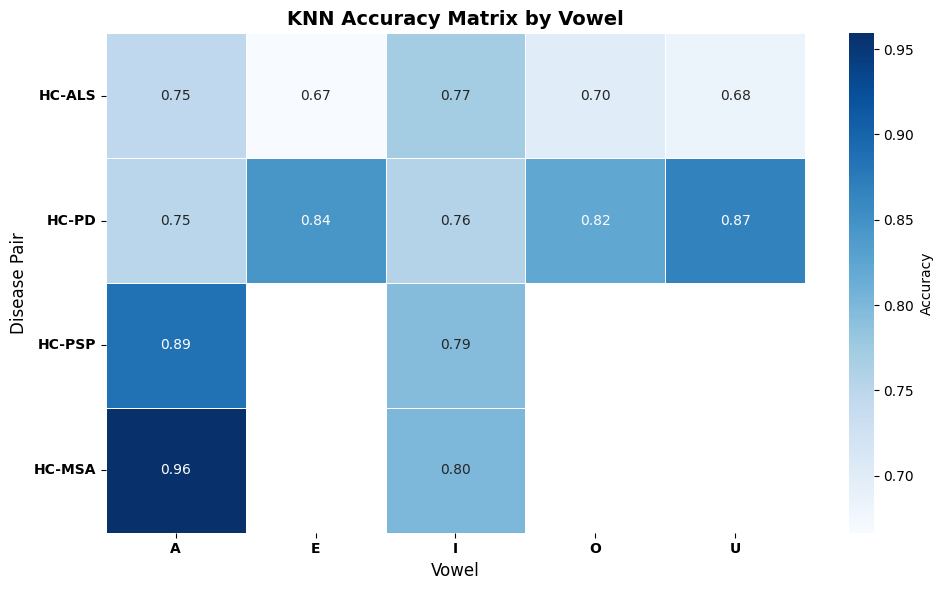

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New KNN Results
knn_results = {
    'Vowel': ['A', 'E', 'I', 'O', 'U'],
    'HC-ALS': [0.746032, 0.666667, 0.771739, 0.700000, 0.683333],
    'HC-PD': [0.751724, 0.844444, 0.756098, 0.822222, 0.866667],
    'HC-PSP': [0.885417, np.nan, 0.793651, np.nan, np.nan],
    'HC-MSA': [0.959184, np.nan, 0.800000, np.nan, np.nan],
}

# Convert results to DataFrame
results_df = pd.DataFrame(knn_results)

# Display the table
print("KNN Results (Accuracy Matrix):")
print(results_df)

# Heatmap Display
plt.figure(figsize=(10, 6))
sns.heatmap(
    results_df.set_index('Vowel').T,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Accuracy'},
    annot_kws={"size": 10}
)
plt.title("KNN Accuracy Matrix by Vowel", fontsize=14, weight='bold')
plt.xlabel("Vowel", fontsize=12)
plt.ylabel("Disease Pair", fontsize=12)
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, rotation=0, weight='bold')
plt.tight_layout()
plt.show()
